<a href="https://colab.research.google.com/github/meenakshikagda/Data-visualization/blob/master/figure_paper_dataset_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
url <- "https://www.encodeproject.org/search/?type=Dataset&status=released&format=json&field=@type&limit=all"



In [5]:
library("jsonlite") #https://cran.r-project.org/web/packages/jsonlite/jsonlite.pdf
library("dplyr")
library("httr") #https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html
library("ggplot2")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
install.packages("splitstackshape")
library(splitstackshape)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
req <- GET(url)

In [9]:
 json <- content(req, as = "text")

No encoding supplied: defaulting to UTF-8.



In [10]:
text <-fromJSON(json)

In [11]:
colnames(text$`@graph`)

[1] "@id"   "@type"

In [12]:
text$`@graph`$`@id`[1] #exploring data for first entry

[1] "/annotations/ENCSR906JNM/"

In [13]:
my_df <- as.data.frame(text$`@graph`)

In [14]:
colnames(my_df)
my_df2 <- cSplit(my_df, "@id", "/")

[1] "@id"   "@type"

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


In [15]:
head(my_df2)

@type,@id_1,@id_2,@id_3
<list>,<lgl>,<chr>,<chr>
"Annotation, FileSet , Dataset , Item",NA,annotations,ENCSR906JNM
"OrganismDevelopmentSeries, Series , Dataset , Item",NA,organism-development-series,ENCSR057SYY
"Project, FileSet, Dataset, Item",NA,projects,ENCSR493EDY
"Reference, FileSet , Dataset , Item",NA,references,ENCSR090MPN
"ReplicationTimingSeries, Series , Dataset , Item",NA,replication-timing-series,ENCSR591OXO
"TransgenicEnhancerExperiment, Dataset , Item",NA,transgenic-enhancer-experiments,ENCSR912DAG


In [16]:
colnames(my_df2)

[1] "@type" "@id_1" "@id_2" "@id_3"

In [17]:
colnames(my_df2)[3] <- "dataset_type"

In [18]:
colnames(my_df2)

[1] "@type"        "@id_1"        "dataset_type" "@id_3"

In [19]:
my_df3 <- my_df2 %>% group_by(dataset_type) %>% summarise(n = n())

In [22]:
my_df3

dataset_type,n
<chr>,<int>
aggregate-series,1
annotations,439020
disease-series,11
experiments,21913
functional-characterization-experiments,461
functional-characterization-series,65
gene-silencing-series,899
matched-sets,5
multiomics-series,3


In [26]:
my_df3 <- as.data.frame(my_df3)

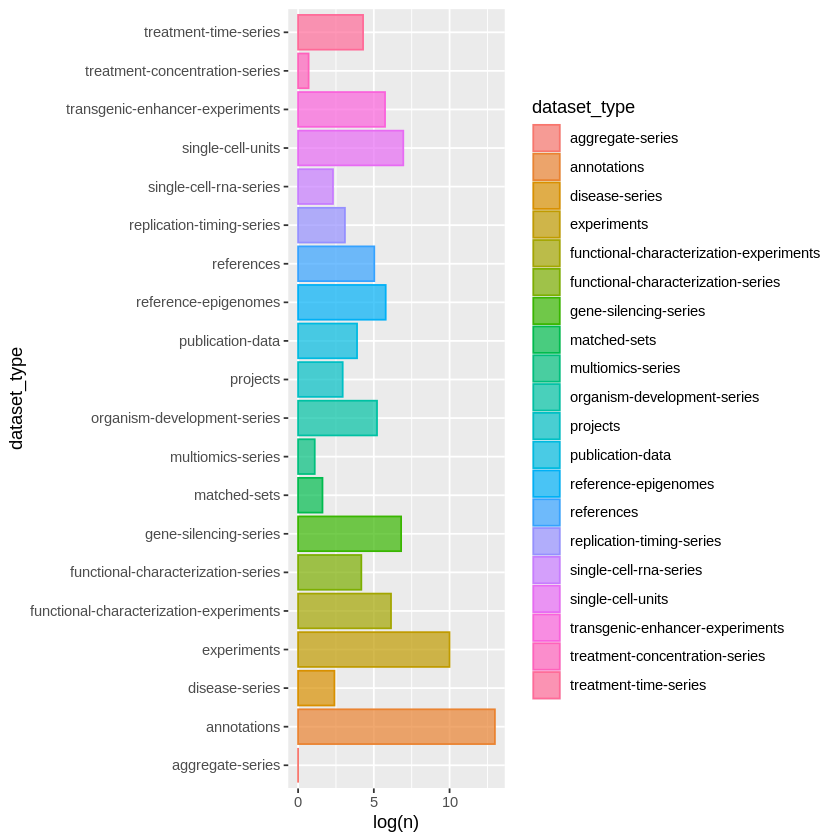

In [53]:
ggplot(my_df3) +
  geom_bar(aes(x=dataset_type, 
               y=log(n), 
               color=dataset_type, 
               fill=dataset_type), 
           stat="identity", alpha=0.7) + coord_flip()

In [26]:
my_df4 <- my_df3[c(2, 3, 4, 5, 6, 7,10, 12, 13, 15:20), ]

In [25]:
my_df3

dataset_type,n
<chr>,<int>
aggregate-series,1
annotations,439020
disease-series,11
experiments,21913
functional-characterization-experiments,461
functional-characterization-series,65
gene-silencing-series,899
matched-sets,5
multiomics-series,3


In [91]:
my_df5 <- my_df4

In [92]:
my_df5[3] <- my_df5[1]

In [93]:
my_df5

dataset_type,n,dataset_type
<chr>,<int>,<chr>
annotations,439020,annotations
disease-series,11,disease-series
experiments,21913,experiments
functional-characterization-experiments,461,functional-characterization-experiments
functional-characterization-series,65,functional-characterization-series
gene-silencing-series,899,gene-silencing-series
organism-development-series,183,organism-development-series
publication-data,49,publication-data
reference-epigenomes,325,reference-epigenomes


In [94]:
colnames(my_df5)[1] <- "Category"

In [ ]:
#https://stackoverflow.com/questions/61297796/replace-whole-word-or-words-with-partial-match-in-r
library(dplyr)
library(stringr)


In [95]:

my_df5 <- my_df5 %>%
  mutate(Category = case_when( 
                            str_detect(Category, 'function|transgenic') ~ 'characterization',
                            str_detect(Category, 'experiments') ~ 'genomics',
                            str_detect(Category, 'annotations') ~ 'annotations',
                            str_detect(Category, 'publication') ~ 'publication',
                            str_detect(Category, 'single') ~ 'series',
                            str_detect(Category, 'series|epigenomes') ~ 'series',
                           TRUE ~ 'OTHER'))

In [96]:
my_df5 

Category,n,dataset_type
<chr>,<int>,<chr>
annotations,439020,annotations
series,11,disease-series
genomics,21913,experiments
characterization,461,functional-characterization-experiments
characterization,65,functional-characterization-series
series,899,gene-silencing-series
series,183,organism-development-series
publication,49,publication-data
series,325,reference-epigenomes


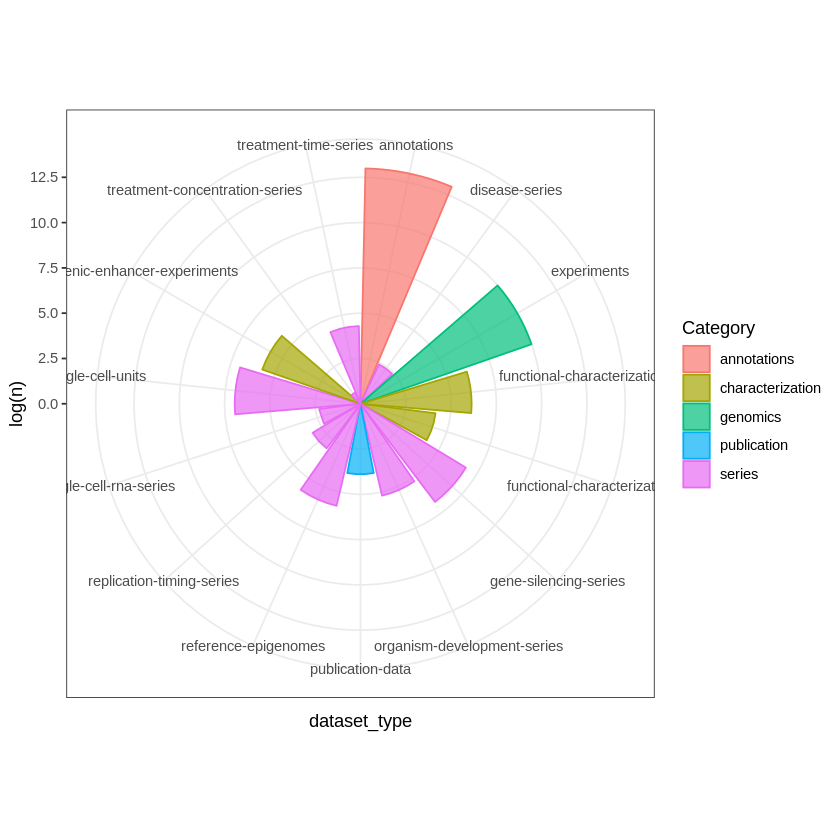

In [99]:

ggplot(my_df5) +
    geom_bar(aes(x=dataset_type,
                    y=log(n), 
                    color=Category, 
                    fill=Category), 
                    stat="identity", alpha=0.7) +
    theme_bw() + coord_polar()


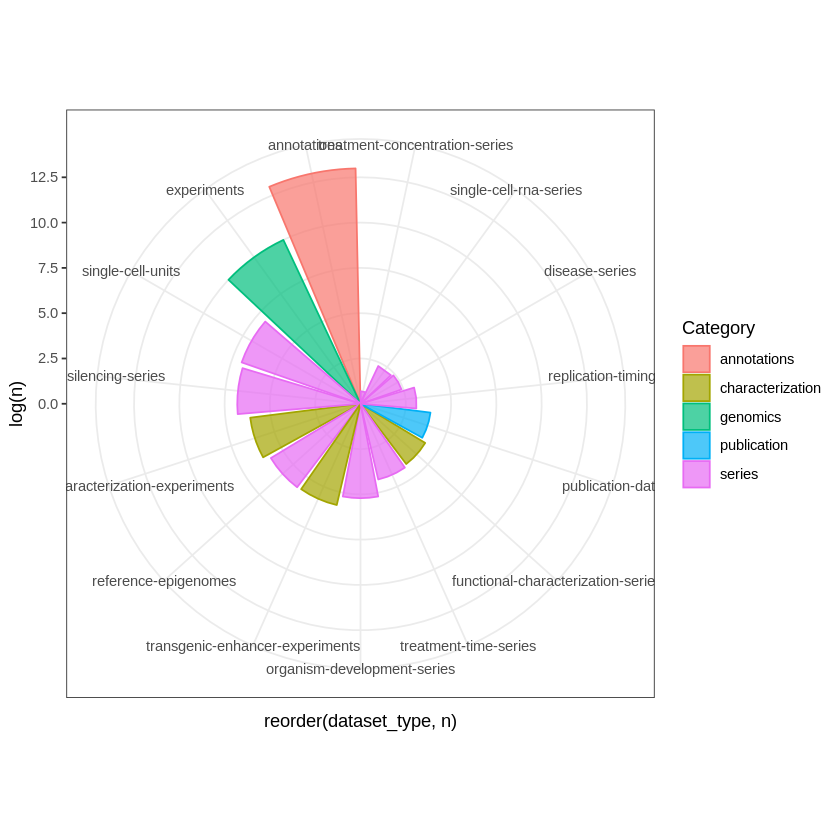

In [102]:
ggplot(my_df5) +
    geom_bar(aes(x=reorder(dataset_type, n),
                    y=log(n), 
                    color=Category, 
                    fill=Category), 
                    stat="identity", alpha=0.7) +
    theme_bw() + coord_polar()


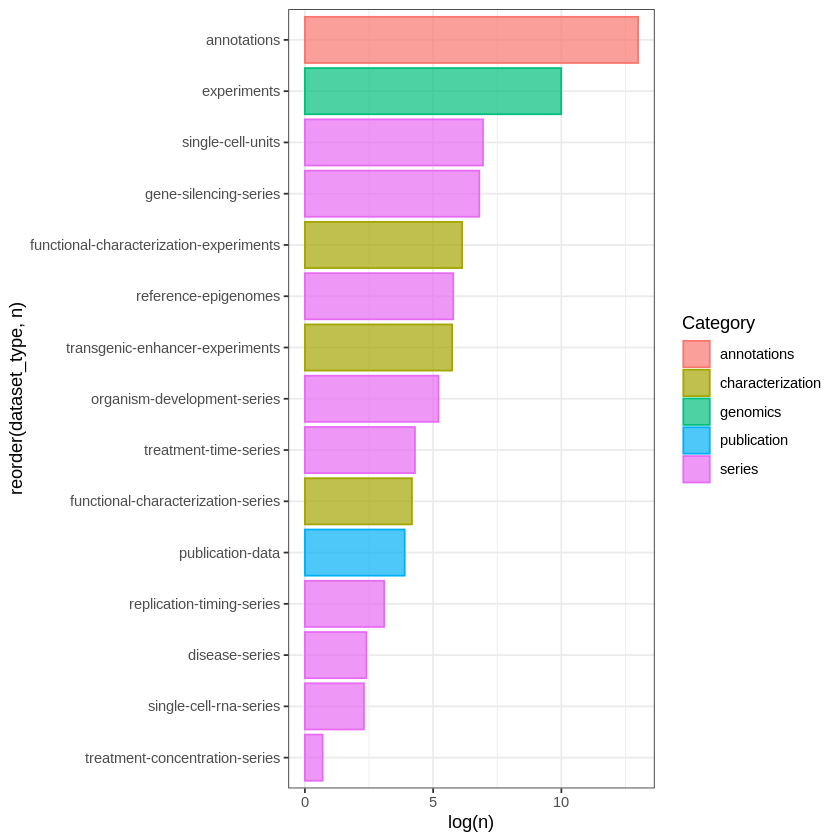

In [105]:
ggplot(my_df5) +
    geom_bar(aes(x=reorder(dataset_type, n),
                    y=log(n), 
                    color=Category, 
                    fill=Category), 
                    stat="identity", alpha=0.7) +
    theme_bw() + coord_flip()

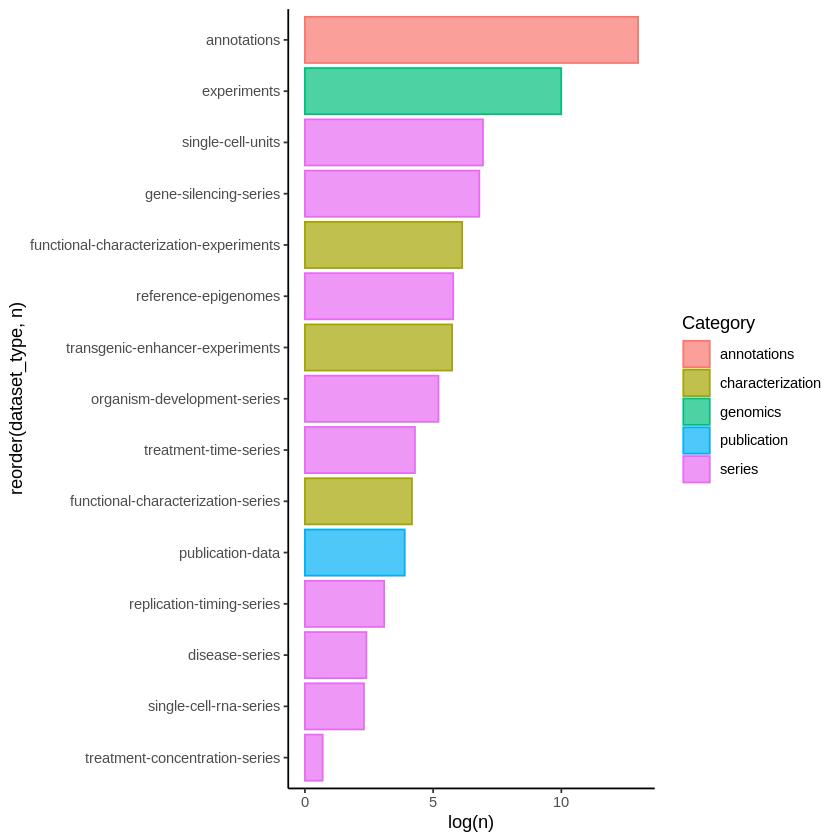

In [106]:
ggplot(my_df5) +
    geom_bar(aes(x=reorder(dataset_type, n),
                    y=log(n), 
                    color=Category, 
                    fill=Category), 
                    stat="identity", alpha=0.7) +
    theme_classic() + coord_flip()